<a href="https://colab.research.google.com/github/Ruthmwaura/module_2_week_2_ip/blob/main/House_price_prediction(Hass_consulting_company).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Defining the question**

**a) Specifying the Data Analytic Question**

A prediction of the house prices upon being provided with the predictor variables. 

**b) Defining the Metric for Success**

Success will be pegged on the ability to create a model that has high accuracy on predicting the house prices upon being provided with the predictor variables. 

**c) Understanding the context**


**d) Recording the Experimental Design**

To successfully conduct this project the we will use CRISP DM, following steps will be taken in order:

-Business understanding

-Data understanding

-Data preparation

-explanatory data analysis

-modelling 

-evaluation

-challenging solution

**e)Data appropriateness** 

The data have variables that will adequately give answers to the analytical question.

In [281]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy as sp
import statsmodels.formula.api as smf
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [282]:
#loading data
from google.colab import files
uploaded = files.upload()

Saving Independent Project Week 7 - house_data.csv to Independent Project Week 7 - house_data (1).csv


In [283]:
#saving the data in a dataframe
import io
house = pd.read_csv(io.BytesIO(uploaded['Independent Project Week 7 - house_data.csv']))

##Understanding data

In [284]:
#previewing data 1st five rows
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [285]:
#previewing the last five rows
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [286]:
#checking number of columns and rows
print('The house dataset has '+str(house.shape[0]) + ' rows and '+ str(house.shape[1])+ ' columns')

The house dataset has 21613 rows and 20 columns


In [287]:
#listing all the columns
house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [288]:
#checking data types and null values
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  int64  
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  object 
 18  sqft_l

All the columns are in the right datatype apart from longtitude and years

The data has no null values:

In [289]:
#checking for unique values
house.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               753
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [290]:
#looking at data statistical description
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,6210.000000,871200.000000


##Data Preparation

###validity

we will drop the columns that we will not be using

In [291]:
house.drop(['sqft_living15','sqft_lot15','id','lat','long'], axis=1, inplace=True)

###accuracy

we will assume that the data provided is accurate

###consistency

we will look for duplicates

In [292]:
#checking for duplicates
house.duplicated().any()

True

we have some duplicates, so we will drop them

In [293]:
#dropping the duplicate
house.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [294]:
#confirming no more duplicates
house.duplicated().any()

False

###completeness

we will check for null values

In [295]:
#checking for null values
house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
dtype: int64

we have no null values in the dataset

###uniformity

we check for outliers and anomalies.

####outliers

In [296]:
def find_outliers_IQR(house):

   q1=house.quantile(0.25)

   q3=house.quantile(0.75)

   IQR=q3-q1

   outliers = house[((house<(q1-1.5*IQR)) | (house>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(house[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated','zipcode']])

outliers.isnull().sum()

price            20466
bedrooms         21059
bathrooms        21034
sqft_living      21033
sqft_lot         19183
floors           21605
waterfront       21442
view             19482
condition        21575
grade            19694
sqft_above       20994
sqft_basement    21109
yr_built         21605
yr_renovated     20692
zipcode          21605
dtype: int64

we have some outliers let's check on the stastical description and see the outliers by comparing the mean, max and min

In [297]:
#stastical description
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
count,2.160500e+04,21605.000000,21605.000000,21605.000000,2.160500e+04,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000
mean,5.401939e+05,3.370886,2.114719,2079.993196,1.511145e+04,1.494029,0.007545,0.234251,3.409535,7.656561,1788.434529,291.558667,1970.993937,84.341865,98077.938162
std,3.674224e+05,0.930094,0.770279,918.560683,4.142750e+04,0.539829,0.086533,0.766217,0.650809,1.175525,828.181562,442.630633,29.369131,401.543673,53.509211
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000
25%,3.215000e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000


according to the description these three columns have extreme outliers we will do a box plot to visualize

-bedrooms 

-yr renovated

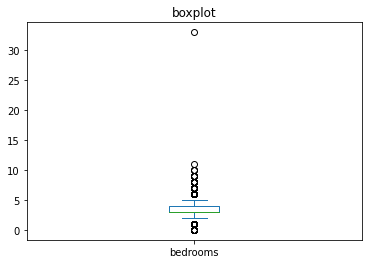

In [298]:
#plotting a boxplot to visualize the outliers
ax = house[['bedrooms']].plot(kind='box', title='boxplot')


plt.show()

In [299]:
bedrooms = house[house['bedrooms'] > 9]
bedrooms


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
8757,520000,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106
13314,1150000,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004
15161,650000,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006
15870,640000,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103
19254,660000,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105


we will drop these columns


In [300]:
house.drop(house[house['bedrooms'] > 9].index, inplace = True)

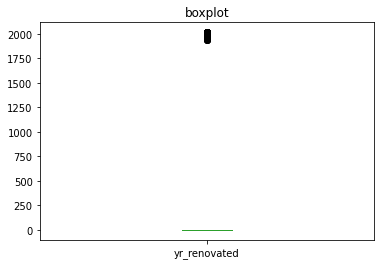

In [301]:
ax = house[['yr_renovated']].plot(kind='box', title='boxplot')

plt.show()

In [302]:
renovation = house[house['yr_renovated'] > 0]
renovation


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125
35,696000,3,2.50,2300,3060,1.5,0,0,3,8,1510,790,1930,2002,98115
95,905000,4,2.50,3300,10250,1.0,0,0,3,7,2390,910,1946,1991,98040
103,1090000,3,2.50,2920,8113,2.0,0,0,3,8,2920,0,1950,2010,98004
115,740500,3,3.50,4380,6350,2.0,0,0,3,8,2780,1600,1900,1999,98117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19622,1150000,3,1.75,1760,6788,2.0,1,4,3,7,1760,0,1940,1960,98125
20057,434900,3,2.00,1520,5040,2.0,0,0,3,7,1520,0,1977,2006,98177
20444,500012,4,2.50,2400,9612,1.0,0,0,3,8,1230,1170,1962,2009,98059
20447,356999,3,1.50,1010,1546,2.0,0,0,3,8,1010,0,1971,2014,98144


we only have 912 out of 21610 rows that were renovated that is 4% so we can change the to renovated(1) and not renovated(0)

In [303]:
house['yr_renovated'].where(house['yr_renovated'] <=0, 1, inplace=True)
house['yr_renovated'].unique()

array([0, 1])

In [304]:
#previewing the new dataset
house.head(30)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,98125
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074
5,1230000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053
6,257500,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003
7,291850,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198
8,229500,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146
9,323000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038


In [305]:
#checking for anomalies
house.nunique()

price            3625
bedrooms           10
bathrooms          30
sqft_living      1038
sqft_lot         9781
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated        2
zipcode            70
dtype: int64

##Eplanatory Data Analysis

###univariate

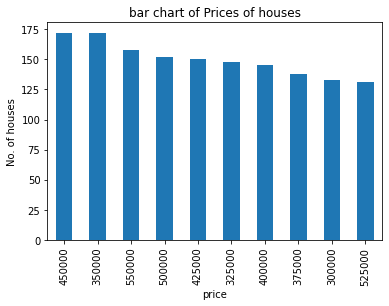

In [306]:
#lets see the distribution of prices
house['price'].value_counts().head(10).plot.bar()
plt.ylabel('No. of houses')
plt.xlabel('price')
plt.title('bar chart of Prices of houses')
plt.show()

most houses range between 450,000 and 350,000

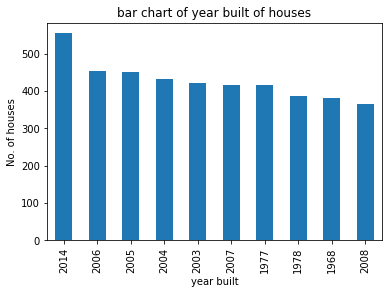

In [307]:
#lets see the distribution of year build
house['yr_built'].value_counts().head(10).plot.bar()
plt.ylabel('No. of houses')
plt.xlabel('year built')
plt.title('bar chart of year built of houses')
plt.show()

most houses were built in 2014 

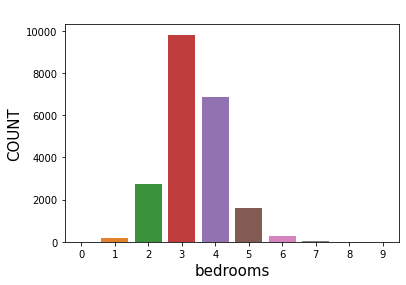

In [308]:
#number of bedrooms
sns.countplot('bedrooms',data = house)
plt.xlabel("bedrooms",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of bedrooms",fontsize=16,color="white")
plt.show()

most houses in the data has 3 bedrooms followed by 4 bedrooms

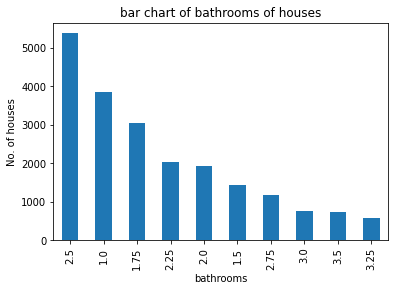

In [309]:
#number of bathrooms
house['bathrooms'].value_counts().head(10).plot.bar()
plt.ylabel('No. of houses')
plt.xlabel('bathrooms')
plt.title('bar chart of bathrooms of houses')
plt.show()

most houses has two “full” bathrooms and one “half” bathroom.

generally a full bathroom has a sink, toilet, and either a tub/shower combo or separate tub and shower.

In [310]:
#plotting pie chart for number of floors
df=house['floors'].value_counts().head(4)
df

1.0    10678
2.0     8232
1.5     1910
3.0      611
Name: floors, dtype: int64

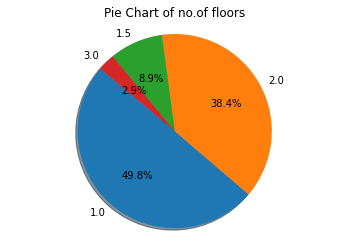

In [311]:
plt.pie(df,labels=['1.0','2.0','1.5','3.0'], autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of no.of floors')
plt.show()

many houses are one story house.

In [312]:
#pie chart for no of views
data=house['view'].value_counts().head()
data

0    19478
2      962
3      509
1      332
4      319
Name: view, dtype: int64

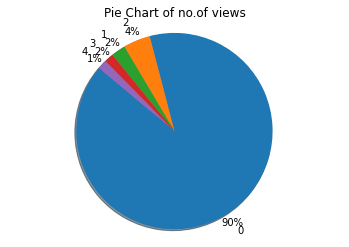

In [313]:
plt.pie(data,labels=['0','2','1','3','4'], shadow = True, startangle = 140,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, radius=1.4)
plt.axis('equal')
plt.title('Pie Chart of no.of views')
plt.show()

most houses has no views, followed by two views.

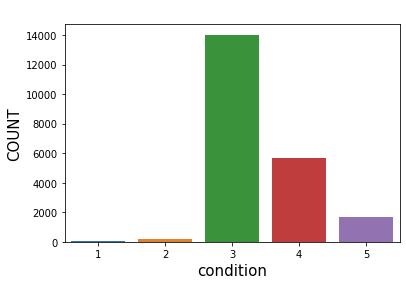

In [314]:
#number of bedrooms
sns.countplot('condition',data = house)
plt.xlabel("condition",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of bedrooms",fontsize=16,color="white")
plt.show()

most houses are of fair codition assuming;

 1=very good

 2=good

 3=fair

 4=poor

 5=very poor 

In [315]:
#houses renovated
ren=house['yr_renovated'].value_counts()
ren

0    20688
1      912
Name: yr_renovated, dtype: int64

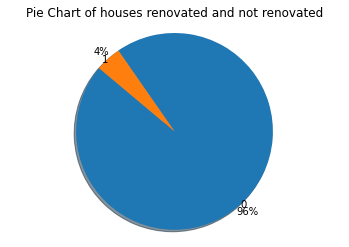

In [316]:
plt.pie(ren,labels=['0','1'], shadow = True, startangle = 140,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1)
plt.axis('equal')
plt.title('Pie Chart of houses renovated and not renovated')
plt.show()

most houses are not renovated

###bivariate

####correlation

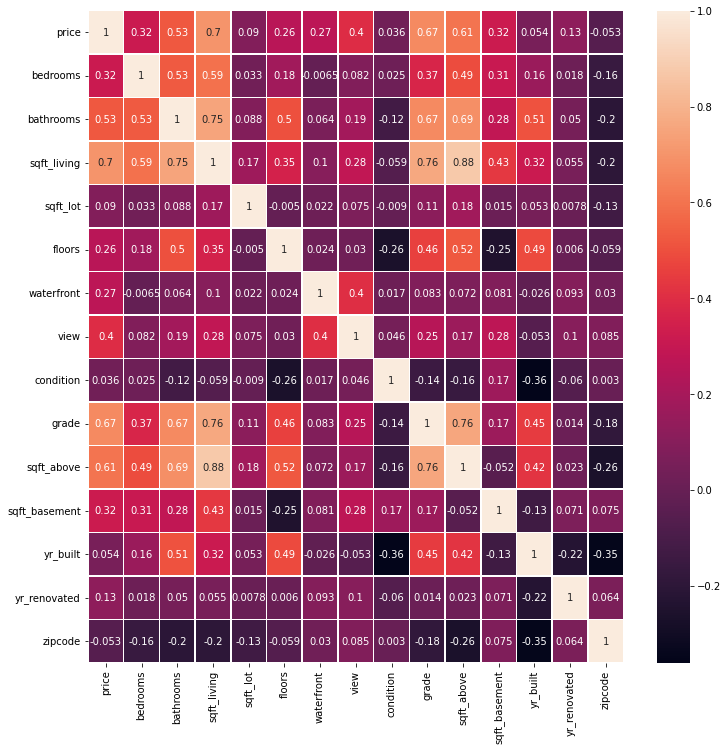

In [317]:
#Plottting a heatmap to show correlation of different numerical variables

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(house.corr(), xticklabels = house.corr().columns, yticklabels = house.corr().columns, annot=True,linewidths=.5, ax=ax)

Using a threshold of 0.5, we observe that:

The price has a high Correlation with the following columns: sqft living,sqft above, bathrooms and  grade with the correlation above 0.5

The number of floors and the number of bathrooms are highly correlated

The number of bathrooms, the grade and the Square feet area of living area



####multicolinearity

In [318]:
#using correlations to compute the VIF score for each variable
independent=house.drop(['price'], axis=1)
correlations=independent.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
bedrooms,1.703226,-0.492193,1.671068e+00,0.113841,0.050905,0.065890,0.118300,-0.050931,0.340249,-2.348887e+00,-1.283253e+00,0.137004,0.048946,0.083245
bathrooms,-0.492193,3.353165,-3.977248e+00,0.030949,-0.701048,0.006349,-0.031348,-0.137433,-0.270314,2.455896e+00,8.584770e-01,-0.911323,-0.260454,-0.004744
sqft_living,1.633236,-3.956760,2.424810e+14,0.421015,1.597138,-0.328530,0.731863,0.816590,1.736169,-2.186636e+14,-1.168221e+14,1.882105,0.536619,0.202594
sqft_lot,0.113841,0.030949,4.165969e-01,1.069296,0.120934,0.017215,-0.057244,0.005597,0.078426,-7.390862e-01,-2.573488e-01,-0.007518,-0.004631,0.096415
floors,0.050905,-0.701048,1.608271e+00,0.120934,1.951574,-0.011887,-0.003141,0.090172,-0.211852,-1.747899e+00,-1.308619e-01,-0.403208,-0.078705,-0.299885
waterfront,0.065890,0.006349,-3.372658e-01,0.017215,-0.011887,1.202405,-0.488641,-0.015097,0.066030,2.239060e-01,1.651064e-01,-0.016727,-0.067758,0.008110
view,0.118300,-0.031348,7.522872e-01,-0.057244,-0.003141,-0.488641,1.389049,-0.019457,-0.255902,-8.114747e-01,-6.672362e-01,0.142661,-0.032083,-0.106877
condition,-0.050931,-0.137433,8.115331e-01,0.005597,0.090172,-0.015097,-0.019457,1.242955,-0.010785,-6.449073e-01,-4.722897e-01,0.542850,0.200653,0.170358
grade,0.340249,-0.270314,1.673116e+00,0.078426,-0.211852,0.066030,-0.255902,-0.010785,2.997576,-3.488393e+00,-1.487214e+00,-0.446992,-0.018501,-0.048223
sqft_above,-2.374792,2.397240,-2.186636e+14,-0.741144,-1.726100,0.216332,-0.795227,-0.650938,-3.539450,1.971855e+14,1.053474e+14,-1.326057,-0.457034,0.100055


sqft_living,sqft_above and sqft_basement have a vif score above 5 sign of multicolinearity, we will drop them.

In [319]:
new_independent=independent.drop(['sqft_living','sqft_above','sqft_basement'], axis=1)
correlations=new_independent.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
bedrooms,1.461902,-0.866705,0.038812,0.095249,0.051543,0.047591,-0.047550,-0.124532,0.250263,0.054667,0.119105
bathrooms,-0.866705,2.684822,-0.054635,-0.460342,-0.005901,-0.190197,-0.159899,-0.901538,-0.715707,-0.253668,-0.005699
sqft_lot,0.038812,-0.054635,1.035045,0.073858,0.009209,-0.061837,0.016461,-0.097969,0.020668,-0.002112,0.127607
floors,0.095249,-0.460342,0.073858,1.604345,-0.029005,0.106740,0.144220,-0.304132,-0.463172,-0.075630,-0.194807
waterfront,0.051543,-0.005901,0.009209,-0.029005,1.200402,-0.487200,-0.011711,0.028048,-0.012275,-0.067177,0.016747
view,0.047591,-0.190197,-0.061837,0.106740,-0.487200,1.340647,-0.034087,-0.341314,0.187034,-0.031586,-0.128277
condition,-0.047550,-0.159899,0.016461,0.144220,-0.011711,-0.034087,1.234093,0.024375,0.547576,0.199908,0.151851
grade,-0.124532,-0.901538,-0.097969,-0.304132,0.028048,-0.341314,0.024375,2.009315,-0.249375,-0.005322,0.079359
yr_built,0.250263,-0.715707,0.020668,-0.463172,-0.012275,0.187034,0.547576,-0.249375,2.161580,0.504809,0.523203
yr_renovated,0.054667,-0.253668,-0.002112,-0.075630,-0.067177,-0.031586,0.199908,-0.005322,0.504809,1.143754,0.056938


##Multiple linear regression



In [320]:
 
df=house.drop(['sqft_living','sqft_above','sqft_basement'], axis=1)

#standardization
std_scaler = StandardScaler()
 
# transform data
data = std_scaler.fit_transform(df.to_numpy())

#converting array back to dataframe
data = pd.DataFrame(data, columns=['price','bedrooms', 'bathrooms', 
                                   'sqft_lot', 'floors','waterfront', 'view', 
                                   'condition', 'grade', 'yr_built', 'yr_renovated',
                                   'zipcode'])
data.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,-0.866153,-0.407702,-1.447414,-0.228408,-0.915120,-0.087199,-0.305686,-0.629195,-0.558558,-0.544829,-0.209961,1.869956
1,-0.005855,-0.407702,0.175955,-0.189983,0.937333,-0.087199,-0.305686,-0.629195,-0.558558,-0.681044,4.762794,0.879462
2,-0.980189,-1.514865,-1.447414,-0.123415,-0.915120,-0.087199,-0.305686,-0.629195,-1.409213,-1.294012,-0.209961,-0.933330
3,0.173771,0.699460,1.149977,-0.244097,-0.915120,-0.087199,-0.305686,2.444215,-0.558558,-0.204291,-0.209961,1.085036
4,-0.082060,-0.407702,-0.148719,-0.169757,-0.915120,-0.087199,-0.305686,-0.629195,0.292098,0.544892,-0.209961,-0.073655


In [321]:
#regression model
#dividing the attributes and label
x=data[['bedrooms', 'bathrooms', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']]
y=data['price']

#splitting data into test and train sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#training the alogarithm

regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [322]:
# To see what coefficients our regression model has chosen, 
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df


,Coefficient
bedrooms,0.001401
bathrooms,0.252939
sqft_lot,0.001977
floors,0.019246
waterfront,0.143233
view,0.124236
condition,0.030580
grade,0.601846
yr_built,-0.334170
yr_renovated,0.005914


the coefficients represent the change in price when a particular variable increases by 1 unit,

In [323]:
#making predictions
# 
y_pred = regressor.predict(x_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
641,-0.639988,-0.391018
14864,-0.427703,-0.347855
19127,-0.612772,-0.550286
4202,-1.061837,-1.668384
8524,-0.599164,-0.575929
...,...,...
5048,-0.792398,-0.726790
17373,-0.558340,-0.330305
2774,-0.337891,0.085318
3197,-0.378715,0.168594


In [324]:
# Evaluating the Algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.394552986558052
Mean Squared Error: 0.37727879722583957
Root Mean Squared Error: 0.6142302477294973


We can see that the value of root mean squared error is 212,773.46,
which is greater than 10% of the mean value of the mean house prices(54,018). 
This means that our algorithm was not very accurate but can still make reasonably good predictions.

In [325]:
# Evaluating the Algorithm with the r2_score
linear_R2 = mlinear_score = r2_score(y_test, y_pred)
print("The R2 score for the linear model is:", linear_R2)

The R2 score for the linear model is: 0.6081041704219481


####residual plot

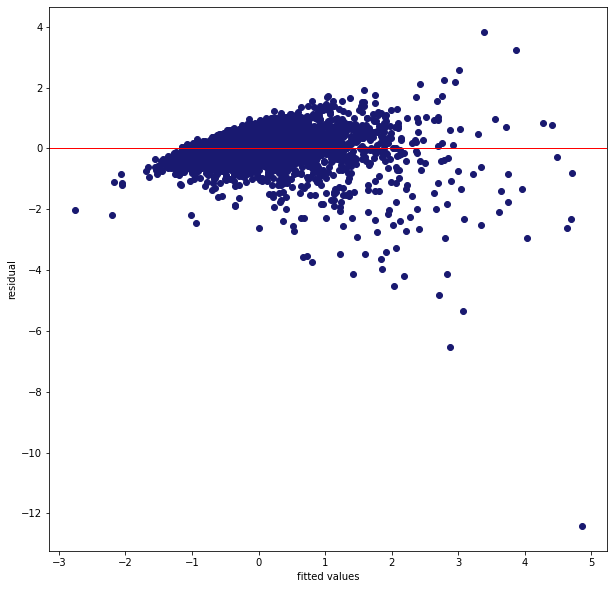

In [326]:
#finding the residual

residual=np.subtract(y_pred, y_test)

## Building the residual plot

plt.figure(figsize = (10,10))
plt.scatter(y_pred, residual, color='midnightblue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residual.mean(), color='red', linewidth=1)
plt.show()

This does not look too bad: our residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. Let's be thorough though, and perform a heteroskedasticity test.

####Heteroskedasticity test

The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the alternative hypothesis that the variance is different for at least one pair of datapoints.

In [327]:
test_result, p_value = sp.stats.bartlett(y_pred, residual)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


###Regularization

####Ridge regression

Ridge regression uses L2 penalty to penalize coefficients. L2 penalty is the penalty equivalent to square of the magnitude of coefficients


In [328]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
ridge_reg= RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

#fit model
ridge_reg.fit(x_train, y_train)

#display lambda that produced the lowest test MSE
print(ridge_reg.alpha_)

0.99


In [329]:
y_predicted=ridge_reg.predict(x_test)

# To compare the actual output values for x_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
df

,Actual,Predicted
641,-0.639988,-0.390991
14864,-0.427703,-0.347819
19127,-0.612772,-0.550187
4202,-1.061837,-1.668257
8524,-0.599164,-0.575947
...,...,...
5048,-0.792398,-0.726780
17373,-0.558340,-0.330281
2774,-0.337891,0.085299
3197,-0.378715,0.168553


In [330]:
ridge_score = r2_score(y_test, y_pred)
print("The R2 score for the ridge model is:", ridge_score)

The R2 score for the ridge model is: 0.6081041704219481


####lasso regression

 Lasso regression uses L1 penalty which is the absolute value of the magnitude of coefficients



In [331]:
#defining the model
lasso_reg = Lasso(alpha=0.5)

#fit model
lasso_reg.fit(x_train, y_train)

#making prediction
y_predicted=lasso_reg.predict(x_test)

# To compare the actual output values for x_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
df

,Actual,Predicted
641,-0.639988,-0.093490
14864,-0.427703,-0.093490
19127,-0.612772,-0.093490
4202,-1.061837,-0.383774
8524,-0.599164,-0.238632
...,...,...
5048,-0.792398,-0.238632
17373,-0.558340,-0.093490
2774,-0.337891,0.051652
3197,-0.378715,0.051652


In [332]:
lasso_score = r2_score(y_test, y_pred)
print("The R2 score for the lasso model is:", lasso_score)

The R2 score for the lasso model is: 0.6081041704219481


##Quantile regression

In [333]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,98125
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074


In [334]:
house.shape

(21600, 15)

In [335]:
x=data[['bedrooms', 'bathrooms','sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 
       'yr_built', 'yr_renovated', 'zipcode']].values
y=data['price'].values

In [336]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile
mod = smf.quantreg('y ~ x', house)
res = mod.fit(q=.5)
res
# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3666
Model:                       QuantReg   Bandwidth:                     0.06880
Method:                 Least Squares   Sparsity:                       0.9455
Date:                Mon, 25 Apr 2022   No. Observations:                21600
Time:                        10:08:55   Df Residuals:                    21588
                                        Df Model:                           11
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0716      0.003    -22.253      0.000      -0.078      -0.065
x[0]           0.0113      0.004      2.896      0.004       0.004       0.019
x[1]           0.1635      0.005     31.018      0.000       0.153       0.174
x[2]           0.0156      0.003      4.762      0.0

In [337]:
# This is our prediction for price based on our model
y_predict = res.predict()

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_predict)))
quantile_R2 = quantile_score = r2_score(y, y_predict)
print("The R2 score for the elastic model is:", quantile_R2)

Root Mean Squared Error: 0.6480599665460066
The R2 score for the elastic model is: 0.5800182797603888


###elastic net regression

In [338]:
# Normalizing the data and creating our grid.
# 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [339]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(x_train,y_train)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [340]:
# Fitting the model

elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(x_train, y_train)

# Making predictions
#
y_pred = elastic.predict(x_test)
elastic_score = r2_score(y_test,y_pred)

# getting RMSE & R2 score
print("The RMSE for the Elastic model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the elastic model is:", elastic_score)

The RMSE for the Elastic model: 0.6145962142779774
The R2 score for the elastic model is: 0.6076370378095641


##summary

In [341]:
# Reviewing the Solution 
# Models vs r2 score.
models = ['multi-linear', 'quantile', 'ridge', 'lasso', 'elastic']
r2_scores = [mlinear_score,ridge_score,lasso_score,quantile_score,elastic_score]
model_results = pd.DataFrame({'Regresion models': models, 'r2_scores': r2_scores})
print(model_results)
print("**************")
print("The mean r2 scores is:", model_results.mean())
#model_results.sort_values(by = 'r2_scores',axis=0,ascending=False)

  Regresion models  r2_scores
0     multi-linear   0.608104
1         quantile   0.608104
2            ridge   0.608104
3            lasso   0.580018
4          elastic   0.607637
**************
The mean r2 scores is: r2_scores    0.602394
dtype: float64


##conclusion

After the analysis using the 5 regression models above, we see that lasso has a lower accuracy than them all so it is not a good fit. the difference between the other regression models accuracy is quite small and there is no clear cut difference to distinguish one from the other in terms of perfomance.

however, 60.23% is not recommendable.


##challenging the solution

to achieve a higher accuracy i recommend use of other models.

##follow up questions

- Did we have the right data?
- Do we need other data to answer our question?
- Did we have the right question?